In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import random
import numpy as np
import matplotlib
import pandas as pd
import dill
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [0]:
df=pd.read_csv("gemini_BTCUSD_2019_1min.csv",skiprows=1)

In [0]:
new_df=pd.DataFrame()

In [0]:
df['Open_SMA10']=talib.SMA(df['Open'],timeperiod=10)
df['High_SMA10']=talib.SMA(df['High'],timeperiod=10)
df['Low_SMA10']=talib.SMA(df['Low'],timeperiod=10)
df['Close_SMA10']=talib.SMA(df['Close'],timeperiod=10)
df['ATR']=talib.ATR(df['High'],df['Low'], df['Close'], timeperiod=10)
df['Open_RSI10']=talib.RSI(df['Open'], timeperiod=10)
df['High_RSI10']=talib.RSI(df['High'],timeperiod=10)
df['Low_RSI10']=talib.RSI(df['Low'],timeperiod=10)
df['Close_RSI10']=talib.RSI(df['Close'],timeperiod=10)
df['Open_EMA10']=talib.EMA(df['Open'],timeperiod=10)
df['High_EMA10']=talib.EMA(df['High'],timeperiod=10)
df['Low_EMA10']=talib.EMA(df['Low'],timeperiod=10)
df['Close_EMA10']=talib.EMA(df['Close'],timeperiod=10)
df['Open_MACD'],df['Open_MACD_signal'],df['Open_MACD_hist'] = talib.MACD(df['Open'], fastperiod=12, slowperiod=26, signalperiod=9)
df['High_MACD'],df['High_MACD_signal'],df['High_MACD_hist'] = talib.MACD(df['High'], fastperiod=12, slowperiod=26, signalperiod=9)
df['Low_MACD'],df['Low_MACD_signal'],df['Low_MACD_hist'] = talib.MACD(df['Low'], fastperiod=12, slowperiod=26, signalperiod=9)
df['Close_MACD'],df['Close_MACD_signal'],df['Close_MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['Open_UpperBollinger'], df['Open_MiddleBollinger'], df['Open_LowerBollinger'] = talib.BBANDS(df['Open'])
df['High_UpperBollinger'], df['High_MiddleBollinger'], df['High_LowerBollinger'] = talib.BBANDS(df['High'])
df['Low_UpperBollinger'], df['Low_MiddleBollinger'], df['Low_LowerBollinger'] = talib.BBANDS(df['Low'])
df['Close_UpperBollinger'], df['Close_MiddleBollinger'], df['Close_LowerBollinger'] = talib.BBANDS(df['Close'])
df['Open_STD'] = talib.STDDEV(df['Open'], timeperiod=10)
df['High_STD'] = talib.STDDEV(df['High'], timeperiod=10)
df['Low_STD'] = talib.STDDEV(df['Low'], timeperiod=10)
df['Close_STD'] = talib.STDDEV(df['Close'], timeperiod=10)
df['ADX']= talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=10)

In [0]:
df=df.dropna()

In [0]:
new_df=df[['Open','High','Low','Close','Volume','Open_SMA10','High_SMA10','Low_SMA10','Close_SMA10','ATR','Open_RSI10','High_RSI10','Low_RSI10','Close_RSI10']].copy()
y_df=df[['Close']].copy()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y_df, test_size = 0.2, shuffle = False)

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.transform(X_test)

min_max_scalar_y=preprocessing.MinMaxScaler()
y_train=min_max_scalar_y.fit_transform(y_train)
y_test=min_max_scalar_y.transform(y_test)

In [0]:
## Create the Dataset ##
X_training=[]
y_training=[]

for i in range(0,len(X_train)-60,60):
    X_training.append(X_train[i:i+60])
    y_training.append(y_train[i+60])



In [0]:
train_opening=[]
for i in range(0,len(X_train)-60,60):
    train_opening.append(X_train['Open'].iloc[i+60])

In [0]:
test_opening=[]
for i in range(0,len(X_test)-60,60):
    test_opening.append(X_test['Open'].iloc[i+60])

In [0]:
train_opening=np.array(train_opening)
test_opening=np.array(test_opening)

In [0]:
# TODO: INSERT CODE HERE

class StockData(Dataset):
  
    def __init__(self, data, labels, transform=None):
 
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        stock_60=self.data[idx]
        closing_price=self.labels[idx]
        sample = {'Stock Data': stock_60, 'label': closing_price}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

with open('/content/drive/My Drive/cis_522_project/X_testing.pickle', 'rb') as f:
  X_test = pickle.load(f)

with open('/content/drive/My Drive/cis_522_project/X_training.pickle', 'rb') as f:
  X_train = pickle.load(f)

with open('/content/drive/My Drive/cis_522_project/y_testing.pickle', 'rb') as f:
  y_test = pickle.load(f)

with open('/content/drive/My Drive/cis_522_project/y_training.pickle', 'rb') as f:
  y_train = pickle.load(f)

In [0]:
train_dataset=StockData(X_train,y_train)
dev_dataset=StockData(X_test,y_test)

In [0]:
train_dataloader = DataLoader(train_dataset, batch_size=16,shuffle=False, num_workers=4)
dev_dataloader = DataLoader(dev_dataset, batch_size=16,shuffle=False, num_workers=4)

In [7]:
for i,data in enumerate(train_dataloader):
  print(data['Stock Data'].shape)
  break

torch.Size([16, 60, 14])


In [0]:
# with open('/content/drive/My Drive/cis_522_project/train.pkl', 'wb') as f:
#   pickle.dump(train_dataloader,f)

# with open('/content/drive/My Drive/cis_522_project/dev.pkl', 'wb') as f:
#   pickle.dump(dev_dataloader,f)

In [0]:
class StockPrediction(nn.Module):
    """ 

  
    Parameters: 
    mode (string): Type of recurrent layer being used. Types are ['rnn', 'lstm', 'gru', 'bilstm']
    output_size (int): Size of the last layer for classification (hint: how many classes do you have?)
    hidden_size (int): Length of your hidden state vector
    """
    def __init__(self, mode, output_size, hidden_size,feature_length):
      super(StockPrediction, self).__init__()

      self.output_size = output_size
      self.hidden_size = hidden_size
      self.feature_length=feature_length
      self.mode=mode
    

      if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
        raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

      elif mode=='lstm':
        self.recurrent = nn.LSTM(self.feature_length, self.hidden_size,batch_first=True)
        self.fc1 = nn.Linear(self.hidden_size, self.hidden_size//2)
        self.fc2 = nn.Linear(self.hidden_size//2, self.hidden_size//4) 
        self.fc3= nn.Linear(self.hidden_size//4, self.output_size) 

      elif mode=="rnn":
  
        self.recurrent= nn.RNN(input_size=self.feature_length, hidden_size=self.hidden_size,batch_first=True)
        
        self.fc1 = nn.Linear(self.hidden_size, self.hidden_size//2)
        self.fc2 = nn.Linear(self.hidden_size//2, self.hidden_size//4) 
        self.fc3= nn.Linear(self.hidden_size//4, self.output_size) 
    
      elif mode=="gru":
        self.recurrent = nn.GRU(self.feature_length, self.hidden_size,batch_first=True)
        self.fc1 = nn.Linear(self.hidden_size, self.hidden_size//2)
        self.fc2 = nn.Linear(self.hidden_size//2, self.hidden_size//4) 
        self.fc3= nn.Linear(self.hidden_size//4, self.output_size) 

      # elif mode=="bilstm":
      #   self.recurrent= nn.LSTM(self.embedding_length, self.hidden_size, bidirectional=True)
      #   self.fc = nn.Linear(2*self.hidden_size, self.output_size)
      #   ## Check how to do this bilstm AVERAGE OR CONCATENATION

      self.dropout=nn.Dropout(0.3)
      self.relu=nn.LeakyReLU(0.1)
    def forward(self,x):

      if (self.mode=="rnn" or self.mode=="gru"):
        # embedded_text=self.embeddings(text)
        # packed_text = nn.utils.rnn.pack_padded_sequence(embedded_text, text_lengths)
        # #_, (hidden_text, _) = self.recurrent(packed_text)
        # _,hidden_text = self.recurrent(packed_text)
        #print("happy before recurrent")
      
        _,hidden_state=self.recurrent(x)

        x1=self.relu(self.fc1(hidden_state))
        x2=self.relu(self.fc2(x1))
        price=self.fc3(x2)

      elif (self.mode=="lstm"):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).requires_grad_()
        c0 = torch.zeros(1, x.size(0), self.hidden_size).requires_grad_()
        # embedded_text=self.embeddings(text)
        # packed_text = nn.utils.rnn.pack_padded_sequence(embedded_text, text_lengths)
        out, (hidden_state, c_n) = self.recurrent(x,(h0.detach(), c0.detach()))

        x1=self.relu(self.fc1(hidden_state))
        x2=self.relu(self.fc2(x1))
        price=self.fc3(x2)

      # elif (self.mode=="bilstm"):

      #   embedded_text=self.embeddings(text)
      #   packed_text = nn.utils.rnn.pack_padded_sequence(embedded_text, text_lengths)
      #   _, (hidden_text, _) = self.recurrent(packed_text)
      #   #print(hidden_text[0,:,:].shape)
      #   hidden_text1=torch.cat((hidden_text[:1,:,:],hidden_text[1:,:,:]),dim=2)
      #   #_,hidden_text = self.recurrent(packed_text)
      #   #print(hidden_text1.shape)
      #   predictions=self.fc(hidden_text1)
        
      # TODO
      return price



In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard
import torch
ROOT_LOG_DIR = "/content/drive/My Drive/logs/Cis522_Project"

In [0]:
import os
from torch.utils.tensorboard import SummaryWriter

In [11]:
%tensorboard --logdir {ROOT_LOG_DIR.replace(" ", "\\ ")}

<IPython.core.display.Javascript object>

In [0]:
# TODO: INSERT CODE HERE

def train_classifier(model, dataloader, loss_function, optimizer, num_epochs = 20, verbose = True, print_every = 1000, log="runs"):
  #tensorboard writer
  writer = SummaryWriter(os.path.join(ROOT_LOG_DIR, log))
  model.train()
  step = 0
  predictions=[]
  corrects=[]
  running_loss=0
  for epoch in range(num_epochs):
    correct = 0
    total = 0
    total_loss = 0
    for i,data in enumerate(dataloader):
      stock_data=data['Stock Data']
      stock_price=data['label']

      stock_data.to(device)
      stock_price.to(device)
      #print(stock_data.shape)

      batch_size = len(stock_price)


      optimizer.zero_grad()
      
      output=model(stock_data.float()).squeeze()
      #print(output)
      #print(stock_price)
      #print("Predicted Stock Price Shape",output.shape)
      #print("Stock Price Shape",stock_price.squeeze().shape)
      #break
      loss = loss_function(output.double(), stock_price.squeeze())
      loss.backward() 
      optimizer.step()

      total_loss += loss.item()
      running_loss+=loss.item()

      if ((step % print_every) == 0):
        
        writer.add_scalar("RMSE Loss2", running_loss/print_every, step)

        if verbose: 
          print("--- Epoch: %s Step: %s RMSE Loss: %s" %(epoch, step, running_loss/print_every))
        running_loss=0
      step = step+1


In [0]:
import torch.optim as optim
net=StockPrediction(mode="lstm", output_size=1, hidden_size=256, feature_length=14)
net=net.float()
net.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=0.0001)

train_classifier(model=net, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 20, verbose = True, print_every = 10,log="lstm")

--- Epoch: 0 Step: 0 RMSE Loss: 0.008082055151151119
--- Epoch: 0 Step: 10 RMSE Loss: 0.07694791309718259
--- Epoch: 0 Step: 20 RMSE Loss: 0.04085368800365792
--- Epoch: 0 Step: 30 RMSE Loss: 0.03083961618408807
--- Epoch: 0 Step: 40 RMSE Loss: 0.006996960241392211
--- Epoch: 0 Step: 50 RMSE Loss: 0.052775318122469606
--- Epoch: 0 Step: 60 RMSE Loss: 0.06699638183382664
--- Epoch: 0 Step: 70 RMSE Loss: 0.008972155606689272
--- Epoch: 0 Step: 80 RMSE Loss: 0.004475027738156443
--- Epoch: 0 Step: 90 RMSE Loss: 0.0009137259929947728
--- Epoch: 0 Step: 100 RMSE Loss: 0.0006753322802309934
--- Epoch: 0 Step: 110 RMSE Loss: 0.0010757006188329165
--- Epoch: 0 Step: 120 RMSE Loss: 0.0017158287689035719
--- Epoch: 0 Step: 130 RMSE Loss: 0.0017991832354660425
--- Epoch: 0 Step: 140 RMSE Loss: 0.0010308794787473583
--- Epoch: 0 Step: 150 RMSE Loss: 0.0006799090767930809
--- Epoch: 0 Step: 160 RMSE Loss: 0.0006509005206429212
--- Epoch: 0 Step: 170 RMSE Loss: 0.0009265138311697804
--- Epoch: 0 Ste

In [0]:
torch.save(net.state_dict(), "/content/drive/My Drive/cis_522_project/lstm_20epochs.pt")

In [0]:
with open('/content/drive/My Drive/cis_522_project/min_max_scalar.pickle', 'rb') as f:
  min_max_scalar_y=pickle.load(f)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.21.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
def evaluate_classifier(model, dataloader, loss_function, recurrent = False):
  model.eval()

  correct = 0
  total = 0
  total_loss = 0
  predictions=[]
  corrects=[]
  for i,data in enumerate(dataloader):
    stock_data=data['Stock Data']
    stock_price=data['label'].squeeze()

    stock_data.to(device)
    stock_price.to(device)
      
    output=model(stock_data.float()).squeeze()
    y_pred=output.detach().numpy()
    y_test=stock_price.detach().numpy()
    #print(y_pred.shape)
    #print(y_test.shape)
    #break
    y_pred=min_max_scalar_y.inverse_transform(y_pred.reshape(-1,1))
    y_test=min_max_scalar_y.inverse_transform(y_test.reshape(-1,1))
    #print(y_pred)
    #print(y_test)
    #print(len(y_test))
    #print(y_pred.reshape(-1).shape)
    #print(y_test.reshape(-1).shape)
    #break
    loss = mean_squared_error(y_test,y_pred,squared=False)
    total += len(y_test)
    total_loss += loss
    for pred in y_pred.reshape(-1):
      predictions.append(pred)
    for test in y_test.reshape(-1):
      corrects.append(test)

  print("Test statistics: RMSE Loss: %s"%(total_loss/total))
  return predictions,corrects

In [0]:
lstm_predictions,lstm_corrects=evaluate_classifier(net, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 4313.052919591571


In [0]:
evaluate_classifier(net, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 23989.94400248247


In [0]:
evaluate_classifier(net, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 4313.052919591571


In [0]:
import torch.optim as optim
net_rnn=StockPrediction(mode="rnn", output_size=1, hidden_size=256, feature_length=14)
net_rnn=net_rnn.float()
net_rnn.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net_rnn.parameters(), lr=0.0001)

train_classifier(model=net_rnn, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 20, verbose = True, print_every = 10,log="rnn")

--- Epoch: 0 Step: 0 RMSE Loss: 0.011991212023506004
--- Epoch: 0 Step: 10 RMSE Loss: 0.10141534910117203
--- Epoch: 0 Step: 20 RMSE Loss: 0.03799145142919341
--- Epoch: 0 Step: 30 RMSE Loss: 0.006646864857582963
--- Epoch: 0 Step: 40 RMSE Loss: 0.007719199529724637
--- Epoch: 0 Step: 50 RMSE Loss: 0.04113688850182588
--- Epoch: 0 Step: 60 RMSE Loss: 0.0423358486651132
--- Epoch: 0 Step: 70 RMSE Loss: 0.007371977803809529
--- Epoch: 0 Step: 80 RMSE Loss: 0.0023234446834925915
--- Epoch: 0 Step: 90 RMSE Loss: 0.0012788043107316808
--- Epoch: 0 Step: 100 RMSE Loss: 0.0007994463743171218
--- Epoch: 0 Step: 110 RMSE Loss: 0.001519650676263639
--- Epoch: 0 Step: 120 RMSE Loss: 0.0018760008055024456
--- Epoch: 0 Step: 130 RMSE Loss: 0.0018343282628677303
--- Epoch: 0 Step: 140 RMSE Loss: 0.0012183559422413869
--- Epoch: 0 Step: 150 RMSE Loss: 0.0008355754748212516
--- Epoch: 0 Step: 160 RMSE Loss: 0.0005359081364704858
--- Epoch: 0 Step: 170 RMSE Loss: 0.0011884200694985726
--- Epoch: 0 Step

In [0]:
rnn_predictions,rnn_corrects=evaluate_classifier(net_rnn, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 12652.46328086287


In [0]:
rnn_predictions,rnn_corrects=evaluate_classifier(net_rnn, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 301.45083780671814


In [0]:
import torch.optim as optim
net_gru=StockPrediction(mode="gru", output_size=1, hidden_size=256, feature_length=14)
net_gru=net_gru.float()
net_gru.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net_gru.parameters(), lr=0.0001)

train_classifier(model=net_gru, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 20, verbose = True, print_every = 10,log="gru")

--- Epoch: 0 Step: 0 RMSE Loss: 0.010855177559164136
--- Epoch: 0 Step: 10 RMSE Loss: 0.09418324923012637
--- Epoch: 0 Step: 20 RMSE Loss: 0.041664943155300754
--- Epoch: 0 Step: 30 RMSE Loss: 0.022474658287215593
--- Epoch: 0 Step: 40 RMSE Loss: 0.0035391276226862424
--- Epoch: 0 Step: 50 RMSE Loss: 0.024805342651504886
--- Epoch: 0 Step: 60 RMSE Loss: 0.02143737290077899
--- Epoch: 0 Step: 70 RMSE Loss: 0.006837770656652935
--- Epoch: 0 Step: 80 RMSE Loss: 0.003955953458315061
--- Epoch: 0 Step: 90 RMSE Loss: 0.002104637591687831
--- Epoch: 0 Step: 100 RMSE Loss: 0.0012664485939440505
--- Epoch: 0 Step: 110 RMSE Loss: 0.0014849214903274112
--- Epoch: 0 Step: 120 RMSE Loss: 0.0016286422901419743
--- Epoch: 0 Step: 130 RMSE Loss: 0.0013566733943257716
--- Epoch: 0 Step: 140 RMSE Loss: 0.0015251279415870035
--- Epoch: 0 Step: 150 RMSE Loss: 0.0009553273374099724
--- Epoch: 0 Step: 160 RMSE Loss: 0.0008408102431127201
--- Epoch: 0 Step: 170 RMSE Loss: 0.0006606065084488783
--- Epoch: 0 S

In [0]:
gru_predictions,gru_corrects=evaluate_classifier(net_gru, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 8320.100013605264


In [0]:
gru_predictions,gru_corrects=evaluate_classifier(net_gru, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 944.3282818258758


In [0]:
import torch.optim as optim
net_lstm=StockPrediction(mode="lstm", output_size=1, hidden_size=256, feature_length=14)
net_lstm=net_lstm.float()
net_lstm.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net_lstm.parameters(), lr=0.0001)

train_classifier(model=net_lstm, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 35, verbose = True, print_every = 10,log="lstm_take-2")

--- Epoch: 0 Step: 0 RMSE Loss: 0.012087216626758648
--- Epoch: 0 Step: 10 RMSE Loss: 0.11287537178593746
--- Epoch: 0 Step: 20 RMSE Loss: 0.06176645709369745
--- Epoch: 0 Step: 30 RMSE Loss: 0.03975487281378143
--- Epoch: 0 Step: 40 RMSE Loss: 0.006866153935596092
--- Epoch: 0 Step: 50 RMSE Loss: 0.016638853036046723
--- Epoch: 0 Step: 60 RMSE Loss: 0.007398923832665713
--- Epoch: 0 Step: 70 RMSE Loss: 0.006390819857708968
--- Epoch: 0 Step: 80 RMSE Loss: 0.003484986610178697
--- Epoch: 0 Step: 90 RMSE Loss: 0.0034916662810609697
--- Epoch: 0 Step: 100 RMSE Loss: 0.002204205127531052
--- Epoch: 0 Step: 110 RMSE Loss: 0.0022788434475893562
--- Epoch: 0 Step: 120 RMSE Loss: 0.0020758581181377126
--- Epoch: 0 Step: 130 RMSE Loss: 0.0017468827786920038
--- Epoch: 0 Step: 140 RMSE Loss: 0.0012854555577721779
--- Epoch: 0 Step: 150 RMSE Loss: 0.0009129739449685375
--- Epoch: 0 Step: 160 RMSE Loss: 0.0007971265508128374
--- Epoch: 0 Step: 170 RMSE Loss: 0.0010539838308302916
--- Epoch: 0 Ste

In [0]:
lstm2_predictions,lstm2_corrects=evaluate_classifier(net_lstm, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 14.270816636995342


In [0]:
lstm2_predictions,lstm2_corrects=evaluate_classifier(net_lstm, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 8.11993382295234


In [0]:
import torch.optim as optim
net_gru2=StockPrediction(mode="gru", output_size=1, hidden_size=256, feature_length=14)
net_gru2=net_gru2.float()
net_gru2.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net_gru2.parameters(), lr=0.0001)

train_classifier(model=net_gru2, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 50, verbose = True, print_every = 1000,log="gru_take-4")

--- Epoch: 0 Step: 0 RMSE Loss: 0.00010112907253967046
--- Epoch: 1 Step: 1000 RMSE Loss: 0.0032812954523501947
--- Epoch: 3 Step: 2000 RMSE Loss: 0.0006231264658209775
--- Epoch: 5 Step: 3000 RMSE Loss: 0.0001949085917002396
--- Epoch: 7 Step: 4000 RMSE Loss: 6.801827764692039e-05
--- Epoch: 9 Step: 5000 RMSE Loss: 5.660045380323175e-05
--- Epoch: 11 Step: 6000 RMSE Loss: 6.387654715620677e-05
--- Epoch: 13 Step: 7000 RMSE Loss: 8.145558550364783e-05
--- Epoch: 15 Step: 8000 RMSE Loss: 8.541226342482197e-05
--- Epoch: 17 Step: 9000 RMSE Loss: 7.421829392042466e-05
--- Epoch: 19 Step: 10000 RMSE Loss: 6.508520482301534e-05
--- Epoch: 21 Step: 11000 RMSE Loss: 5.766423306975476e-05
--- Epoch: 23 Step: 12000 RMSE Loss: 5.137314949568028e-05
--- Epoch: 25 Step: 13000 RMSE Loss: 4.884987530281528e-05
--- Epoch: 26 Step: 14000 RMSE Loss: 4.464808116532436e-05
--- Epoch: 28 Step: 15000 RMSE Loss: 3.9811997307544086e-05
--- Epoch: 30 Step: 16000 RMSE Loss: 3.576472470862329e-05
--- Epoch: 32 

In [0]:
gru2_predictions,gru2_corrects=evaluate_classifier(net_gru1, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 13.798741770003023


In [0]:
gru2_predictions,gru2_corrects=evaluate_classifier(net_gru1, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 7.3346245501294645


In [0]:
import torch.optim as optim
net_rnn1=StockPrediction(mode="rnn", output_size=1, hidden_size=256, feature_length=14)
net_rnn1=net_rnn1.float()
net_rnn1.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net_rnn1.parameters(), lr=0.0001)

train_classifier(model=net_rnn1, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 25, verbose = True, print_every = 10,log="rnn_take-3")

--- Epoch: 0 Step: 0 RMSE Loss: 0.009324433397758397
--- Epoch: 0 Step: 10 RMSE Loss: 0.07474964014209781
--- Epoch: 0 Step: 20 RMSE Loss: 0.02070632474414384
--- Epoch: 0 Step: 30 RMSE Loss: 0.004031802037828731
--- Epoch: 0 Step: 40 RMSE Loss: 0.005569967120402095
--- Epoch: 0 Step: 50 RMSE Loss: 0.04012457219424005
--- Epoch: 0 Step: 60 RMSE Loss: 0.048514079650298546
--- Epoch: 0 Step: 70 RMSE Loss: 0.005596214113588483
--- Epoch: 0 Step: 80 RMSE Loss: 0.0016094269095962659
--- Epoch: 0 Step: 90 RMSE Loss: 0.0011226781556187252
--- Epoch: 0 Step: 100 RMSE Loss: 0.0006178228422741051
--- Epoch: 0 Step: 110 RMSE Loss: 0.0013745640382883467
--- Epoch: 0 Step: 120 RMSE Loss: 0.0018377105204954226
--- Epoch: 0 Step: 130 RMSE Loss: 0.0017278857814151875
--- Epoch: 0 Step: 140 RMSE Loss: 0.0012441531709785306
--- Epoch: 0 Step: 150 RMSE Loss: 0.0006918635311543815
--- Epoch: 0 Step: 160 RMSE Loss: 0.0005970806283864474
--- Epoch: 0 Step: 170 RMSE Loss: 0.0008487049772533848
--- Epoch: 0 S

In [0]:
rnn2_predictions,rnn2_corrects=evaluate_classifier(net_rnn1, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 16.32383993126963


In [0]:
rnn2_predictions,rnn2_corrects=evaluate_classifier(net_rnn1, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 11.380466132652042


In [0]:
torch.save(net_lstm.state_dict(), "/content/drive/My Drive/cis_522_project/lstm_35_finalepochs.pt")
torch.save(net_gru1.state_dict(), "/content/drive/My Drive/cis_522_project/gru_30_finalepochs.pt")
torch.save(net_rnn1.state_dict(), "/content/drive/My Drive/cis_522_project/rnn_25_finalepochs.pt")

In [0]:
with open('/content/drive/My Drive/cis_522_project/lstm_predictions.pkl', 'wb') as f:
  pickle.dump(lstm2_predictions,f)

with open('/content/drive/My Drive/cis_522_project/lstm_corrects.pkl', 'wb') as f:
  pickle.dump(lstm2_corrects,f)

with open('/content/drive/My Drive/cis_522_project/gru_predictions.pkl', 'wb') as f:
  pickle.dump(gru2_predictions,f)

with open('/content/drive/My Drive/cis_522_project/gru_corrects.pkl', 'wb') as f:
  pickle.dump(gru2_corrects,f)

with open('/content/drive/My Drive/cis_522_project/rnn_predictions.pkl', 'wb') as f:
  pickle.dump(rnn2_predictions,f)

with open('/content/drive/My Drive/cis_522_project/rnn_corrects.pkl', 'wb') as f:
  pickle.dump(rnn2_corrects,f)

In [0]:
with open('/content/drive/My Drive/cis_522_project/test_opening.pickle', 'rb') as f:
  test_opening = pickle.load(f)

In [0]:
#len(test_opening)
print(lstm_corrects[0:10],lstm2_predictions[0:10])

[4089.02, 4095.19, 4098.0, 4094.01, 4091.76, 4088.44, 4088.98, 4096.71, 4092.35, 4092.53] [4101.18, 4122.1865, 4127.9155, 4100.0874, 4122.171, 4120.268, 4108.707, 4127.6064, 4100.9893, 4114.1646]


In [0]:
def calculate_profit(Opening, Close_Predictions, Close_Real, initial_asset):
    current_cash = initial_asset
    #bitcoin_held = 0
    #i = 0
    profit_earned=0
    profit_graph = []
    j=0
    for i in range(len(Opening)):        
        j=j+1
        if (Close_Predictions[i]>Opening[i]): ## Meaning that the Closing stock is greater than opening stock showing increase over the day
          initial_cash=current_cash
          print("Initial Cash at the Start of Day")
          no_stocks_bought=current_cash/Opening[i] ##Buy the stocks at Opening because stocks price will increase
          print("Due to Predicted Increase in Stock Price over the hour, stocks bought=",no_stocks_bought)
          current_cash=0 ##Bought all the stocks no cash left
          current_cash=current_cash+no_stocks_bought*Close_Real[i] ##Sell the stocks at end day to secure profit
          print("At the end day stocks sold. Total Cash we got back=",current_cash)
          profit_earned=profit_earned+(current_cash-initial_cash)
          print("Total Profit Earned Till Now=",profit_earned)
          profit_graph.append(profit_earned)

        else:#(Opening[i]>=Close_Predictions[i]):
          # No stocks bought because price is predicted to decrease over the day
          #no_stocks_bought=no_stocks_bought
          print("Due to Predicted Decrease in Stock Price over the hour, no stocks bought")
          #No change in cash
          current_cash=current_cash
          print("Due to Predicted Decrease in Stock Price over the hour, Cash Remains same")
          #No increase in Profit
          profit_earned=profit_earned
          print("Due to Predicted Decrease in Stock Price over the hour, Profit Remains same")
          profit_graph.append(profit_earned)

    print("total_hours",j)
    return profit_earned, initial_asset, current_cash, profit_graph

In [0]:
total_profit,intial_asset,final_asset,profit_graph=calculate_profit(test_opening_real, lstm_pred, test_closing_real, 1000000) # We start with 1million dollars at beginning

Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.40914090186973
At the end day stocks sold. Total Cash we got back= 1000251.741415129
Total Profit Earned Till Now= 251.74141512904316
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.44677079477236
At the end day stocks sold. Total Cash we got back= 1000251.7414151292
Total Profit Earned Till Now= 251.74141512915958
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.0366216521427
At the end day stocks sold. Total Cash we got back= 1000251.7414151293
Total Profit Earned Till Now= 251.741415129276
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.12309223746675
At the end day stocks sold. Total Cash we got back= 1000590.0112824169
Total Profit Earned Till Now= 590.0112824168755
Initial Cash at the Start of Day


In [0]:
total_profit,intial_asset,final_asset,profit_graph=calculate_profit(test_opening_real, rnn_pred, test_closing_real, 1000000) # We start with 1million dollars at beginning

Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.40914090186973
At the end day stocks sold. Total Cash we got back= 1000251.741415129
Total Profit Earned Till Now= 251.74141512904316
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.44677079477236
At the end day stocks sold. Total Cash we got back= 1000251.7414151292
Total Profit Earned Till Now= 251.74141512915958
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.0366216521427
At the end day stocks sold. Total Cash we got back= 1000251.7414151293
Total Profit Earned Till Now= 251.741415129276
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.12309223746675
At the end day stocks sold. Total Cash we got back= 1000590.0112824169
Total Profit Earned Till Now= 590.0112824168755
Initial Cash at the Start of Day


In [0]:
total_profit,intial_asset,final_asset,profit_graph=calculate_profit(test_opening_real, gru_pred, test_closing_real, 1000000) # We start with 1million dollars at beginning

Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.40914090186973
At the end day stocks sold. Total Cash we got back= 1000251.741415129
Total Profit Earned Till Now= 251.74141512904316
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.44677079477236
At the end day stocks sold. Total Cash we got back= 1000251.7414151292
Total Profit Earned Till Now= 251.74141512915958
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.0366216521427
At the end day stocks sold. Total Cash we got back= 1000251.7414151293
Total Profit Earned Till Now= 251.741415129276
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.12309223746675
At the end day stocks sold. Total Cash we got back= 1000590.0112824169
Total Profit Earned Till Now= 590.0112824168755
Initial Cash at the Start of Day


## Attention Module with LSTM 

In [0]:
class Attention(nn.Module):
  def __init__(self, hidden_size):
    super(Attention, self).__init__()
    
    self.hidden_size=hidden_size

    self.fc1=nn.Linear(2*self.hidden_size,self.hidden_size)
    self.fc2=nn.Linear(self.hidden_size,1)
    self.softmax=nn.Softmax(dim=0)

  def forward(self, hidden, encoder_outputs):

    """ 
    Parameters: 
    hidden (vector): Final hidden state from the input sequence
    encoder_outputs (tensor): Hidden state produced from each of the input sequence tokens
    """
    #print(encoder_outputs)
    #print(len(encoder_outputs[0]),encoder_outputs[1])
    #print(encoder_outputs.shape)
    #print(hidden.shape)
    size=len(encoder_outputs)
    y=torch.zeros(0).to(device)
    for i in range(size):
      y=torch.cat((y,hidden),0)
    #print(encoder_outputs.shape)
    #print(y.shape)
    x=torch.cat((encoder_outputs,y),2)

    x=self.fc1(x)
    x=self.fc2(x)
    x=self.softmax(x)

    x=torch.bmm(x.permute(1,2,0),encoder_outputs.permute(1,0,2))

    x=x.permute(1,0,2)
    
    return x

In [0]:
class RegressionWithAttention(nn.Module):
  def __init__(self, mode, output_size, hidden_size, feature_length):
      super(RegressionWithAttention, self).__init__()

      self.output_size = output_size
      self.hidden_size = hidden_size
      self.feature_length=feature_length    

      if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
        raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

      elif mode=='lstm':
        self.recurrent = nn.LSTM(self.feature_length, self.hidden_size)
        self.fc1 = nn.Linear(2*self.hidden_size, self.hidden_size)
        self.fc2=  nn.Linear(self.hidden_size, self.hidden_size//2)
        self.fc3=nn.Linear(self.hidden_size//2, self.output_size)

      elif mode=='gru':
        self.recurrent = nn.GRU(self.feature_length, self.hidden_size)
        self.fc1 = nn.Linear(2*self.hidden_size, self.hidden_size)
        self.fc2=  nn.Linear(self.hidden_size, self.hidden_size//2)
        self.fc3=nn.Linear(self.hidden_size//2, self.output_size)


      self.attention=Attention(self.hidden_size)
      self.attention.to(device)
      self.relu=nn.LeakyReLU(0.1)
  def forward(self, x):

      #encoder_outputs, (hidden_state, _) = self.recurrent(x) #For LSTM
      encoder_outputs,(hidden_state,_) = self.recurrent(x)# FOR GRU
      #encoder_outputs=torch.nn.utils.rnn.pad_packed_sequence(encoder_outputs)

      #hidden_state1=torch.cat((hidden_state[:1,:,:],hidden_state[1:,:,:]),dim=2)
      hidden_state.to(device)
      #print("first",encoder_outputs.shape)
      encoder_outputs.to(device)
      context=self.attention(hidden_state,encoder_outputs)
      comb=torch.cat((context,hidden_state),dim=2)

      x1=self.relu(self.fc1(comb))
      x2=self.relu(self.fc2(x1))
      x3=self.fc3(x2)


      # TODO
      return x3  

In [0]:
# TODO: INSERT CODE HERE

def train_classifier(model, dataloader, loss_function, optimizer, num_epochs = 20, verbose = True, print_every = 1000, log="runs"):
  #tensorboard writer
  writer = SummaryWriter(os.path.join(ROOT_LOG_DIR, log))
  model.train()
  step = 0
  predictions=[]
  corrects=[]
  running_loss=0
  for epoch in range(num_epochs):
    correct = 0
    total = 0
    total_loss = 0
    for i,data in enumerate(dataloader):
      stock_data=data['Stock Data']
      stock_data=stock_data.permute(1,0,2)
      stock_price=data['label']

      stock_data.to(device)
      stock_price.to(device)
      #print(stock_data.shape)

      batch_size = len(stock_price)


      optimizer.zero_grad()
      
      output=model(stock_data.float()).squeeze()
      #print(output)
      #print(stock_price)
      #print("Predicted Stock Price Shape",output.shape)
      #print("Stock Price Shape",stock_price.squeeze().shape)
      #break
      loss = loss_function(output.double(), stock_price.squeeze())
      loss.backward() 
      optimizer.step()

      total_loss += loss.item()
      running_loss+=loss.item()

      if ((step % print_every) == 0):
        
        writer.add_scalar("RMSE Loss2", running_loss/print_every, step)

        if verbose: 
          print("--- Epoch: %s Step: %s RMSE Loss: %s" %(epoch, step, running_loss/print_every))
        running_loss=0
      step = step+1


In [18]:
import torch.optim as optim
net_lstm_attention=RegressionWithAttention(mode="lstm", output_size=1, hidden_size=256, feature_length=14)
net_lstm_attention.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net_lstm_attention.parameters(), lr=0.0001)

train_classifier(model=net_lstm_attention, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 35, verbose = True, print_every = 1000,log="lstm_attention")

--- Epoch: 0 Step: 0 RMSE Loss: 6.440391794355282e-05
--- Epoch: 1 Step: 1000 RMSE Loss: 0.0032828532155364126
--- Epoch: 3 Step: 2000 RMSE Loss: 0.0010489082161314642
--- Epoch: 5 Step: 3000 RMSE Loss: 0.0002370927257138841
--- Epoch: 7 Step: 4000 RMSE Loss: 0.0001088391531956014
--- Epoch: 9 Step: 5000 RMSE Loss: 9.562974682885336e-05
--- Epoch: 11 Step: 6000 RMSE Loss: 0.00010589874326595511
--- Epoch: 13 Step: 7000 RMSE Loss: 0.00012514374240477584
--- Epoch: 15 Step: 8000 RMSE Loss: 0.00010500234155586808
--- Epoch: 17 Step: 9000 RMSE Loss: 8.81014362231198e-05
--- Epoch: 19 Step: 10000 RMSE Loss: 7.590773826694691e-05
--- Epoch: 21 Step: 11000 RMSE Loss: 6.597495361884906e-05
--- Epoch: 23 Step: 12000 RMSE Loss: 5.868367660305366e-05
--- Epoch: 25 Step: 13000 RMSE Loss: 5.8301481831326834e-05
--- Epoch: 26 Step: 14000 RMSE Loss: 5.461492691459861e-05
--- Epoch: 28 Step: 15000 RMSE Loss: 4.97364165559062e-05
--- Epoch: 30 Step: 16000 RMSE Loss: 4.689439655305699e-05
--- Epoch: 32 

In [0]:
def evaluate_classifier(model, dataloader, loss_function, recurrent = False):
  model.eval()

  correct = 0
  total = 0
  total_loss = 0
  predictions=[]
  corrects=[]
  for i,data in enumerate(dataloader):
    stock_data=data['Stock Data'].permute(1,0,2)
    stock_price=data['label'].squeeze()

    stock_data.to(device)
    stock_price.to(device)
      
    output=model(stock_data.float()).squeeze()
    y_pred=output.detach().numpy()
    y_test=stock_price.detach().numpy()
    #print(y_pred.shape)
    #print(y_test.shape)
    #break
    y_pred=min_max_scalar_y.inverse_transform(y_pred.reshape(-1,1))
    y_test=min_max_scalar_y.inverse_transform(y_test.reshape(-1,1))
    #print(y_pred)
    #print(y_test)
    #print(len(y_test))
    #print(y_pred.reshape(-1).shape)
    #print(y_test.reshape(-1).shape)
    #break
    loss = mean_squared_error(y_test,y_pred,squared=False)
    total += len(y_test)
    total_loss += loss
    for pred in y_pred.reshape(-1):
      predictions.append(pred)
    for test in y_test.reshape(-1):
      corrects.append(test)

  print("Test statistics: RMSE Loss: %s"%(total_loss/total))
  return predictions,corrects

In [0]:
lstm_attention_predictions,lstm_attention_corrects=evaluate_classifier(net_lstm_attention, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 15.304639941681275


In [0]:
lstm_attention_predictions,lstm_attention_corrects=evaluate_classifier(net_lstm_attention, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 8.713483290002616


In [0]:
total_profit,intial_asset,final_asset,profit_graph=calculate_profit(test_opening_real, lstm_attention_pred, test_closing_real, 1000000) # We start with 1million dollars at beginning

Due to Predicted Decrease in Stock Price over the hour, no stocks bought
Due to Predicted Decrease in Stock Price over the hour, Cash Remains same
Due to Predicted Decrease in Stock Price over the hour, Profit Remains same
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.385248906376
At the end day stocks sold. Total Cash we got back= 1000000.0000000001
Total Profit Earned Till Now= 1.1641532182693481e-10
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.97495131122844
At the end day stocks sold. Total Cash we got back= 1000000.0000000002
Total Profit Earned Till Now= 2.3283064365386963e-10
Due to Predicted Decrease in Stock Price over the hour, no stocks bought
Due to Predicted Decrease in Stock Price over the hour, Cash Remains same
Due to Predicted Decrease in Stock Price over the hour, Profit Remains same
Initial Cash at the Start of Day
Due to Predicted Increase in 

In [0]:
import torch.optim as optim
net_gru_attention=RegressionWithAttention(mode="gru", output_size=1, hidden_size=256, feature_length=14)
net_gru_attention.to(device)
loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net_gru_attention.parameters(), lr=0.0001)

train_classifier(model=net_gru_attention, dataloader=train_dataloader, loss_function=loss,optimizer=opt, num_epochs = 35, verbose = True, print_every = 1000,log="gru_attention")

--- Epoch: 0 Step: 0 RMSE Loss: 5.995319970182993e-05
--- Epoch: 1 Step: 1000 RMSE Loss: 0.0026924585946527108
--- Epoch: 3 Step: 2000 RMSE Loss: 0.0005757758009779435
--- Epoch: 5 Step: 3000 RMSE Loss: 0.00014920647525535057
--- Epoch: 7 Step: 4000 RMSE Loss: 8.233027072978286e-05
--- Epoch: 9 Step: 5000 RMSE Loss: 0.00010459340789907974
--- Epoch: 11 Step: 6000 RMSE Loss: 0.00013262094505467743
--- Epoch: 13 Step: 7000 RMSE Loss: 0.00011543374003952615
--- Epoch: 15 Step: 8000 RMSE Loss: 9.935746093667687e-05
--- Epoch: 17 Step: 9000 RMSE Loss: 9.494527681326694e-05
--- Epoch: 19 Step: 10000 RMSE Loss: 8.573629615150524e-05
--- Epoch: 21 Step: 11000 RMSE Loss: 7.614000656736552e-05
--- Epoch: 23 Step: 12000 RMSE Loss: 6.767773183348313e-05
--- Epoch: 25 Step: 13000 RMSE Loss: 6.652232690619712e-05
--- Epoch: 26 Step: 14000 RMSE Loss: 6.147321147280948e-05
--- Epoch: 28 Step: 15000 RMSE Loss: 5.527232429183915e-05
--- Epoch: 30 Step: 16000 RMSE Loss: 5.1122605433844744e-05
--- Epoch: 

In [0]:
gru_attention_predictions,gru_attention_corrects=evaluate_classifier(net_gru_attention, train_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 11.7366895946802


In [0]:
gru_attention_predictions,gru_attention_corrects=evaluate_classifier(net_gru_attention, dev_dataloader, loss, recurrent = False)

Test statistics: RMSE Loss: 11.369356825816132


In [0]:
total_profit,intial_asset,final_asset,profit_graph=calculate_profit(test_opening_real, gru_attention_pred, test_closing_real, 1000000) # We start with 1million dollars at beginning

Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.40914090186973
At the end day stocks sold. Total Cash we got back= 1000251.741415129
Total Profit Earned Till Now= 251.74141512904316
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 244.44677079477236
At the end day stocks sold. Total Cash we got back= 1000251.7414151292
Total Profit Earned Till Now= 251.74141512915958
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.0366216521427
At the end day stocks sold. Total Cash we got back= 1000251.7414151293
Total Profit Earned Till Now= 251.741415129276
Initial Cash at the Start of Day
Due to Predicted Increase in Stock Price over the hour, stocks bought= 245.12309223746675
At the end day stocks sold. Total Cash we got back= 1000590.0112824169
Total Profit Earned Till Now= 590.0112824168755
Initial Cash at the Start of Day


SyntaxError: ignored

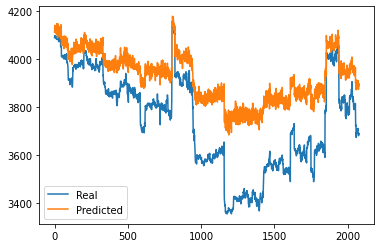

In [0]:
import matplotlib.pyplot as plt


start = 0
end = -1

real = plt.plot(gru_attention, label='real')
pred = plt.plot(rnn2_predictions, label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

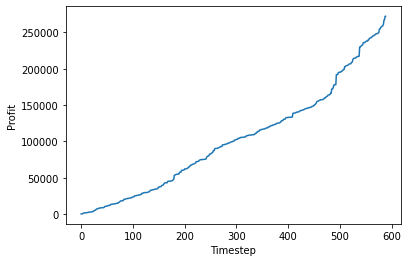

In [0]:
plt.plot(profit_graph)
plt.xlabel("Timestep")
plt.ylabel("Profit")
plt.show()

In [0]:
len(profit_graph)

589

In [0]:
gru_attention_predictions